In [1]:
%tensorflow_version 1.x
%matplotlib inline
#import keras
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import callbacks
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from keras.applications import VGG16

conv_base_vgg = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(200, 200, 3))
conv_base_vgg.summary()





58892288/58889256 [==============================] - 2s 0us/step






Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
____________________________________________________

In [4]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/drive/My Drive/DATA SCIENCE/LEZIONI/ML/Polignano/Keras/Challenge_Master_DS/training'
valid_dir = '/content/drive/My Drive/DATA SCIENCE/LEZIONI/ML/Polignano/Keras/Challenge_Master_DS/test'
test_dir = '/content/drive/My Drive/DATA SCIENCE/LEZIONI/ML/Polignano/Keras/Challenge_Master_DS/test_def'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=25,
    class_mode='categorical',
    seed=3)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(200, 200),
    batch_size=25,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=25,
    class_mode=None,
    shuffle=False,)

Found 938 images belonging to 6 classes.
Found 150 images belonging to 6 classes.
Found 77 images belonging to 6 classes.


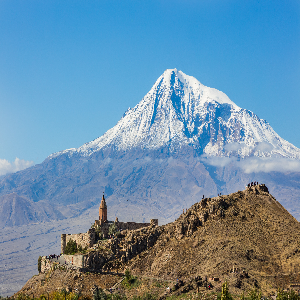

In [5]:
y_foto = Image.open(valid_generator.filepaths[50])
y_res = y_foto.resize((300, 300), Image.NEAREST)
y_res

In [6]:
model_vgg = models.Sequential()
model_vgg.add(conv_base_vgg)
model_vgg.add(layers.Flatten())
model_vgg.add(layers.BatchNormalization())
model_vgg.add(layers.Dropout(.5))
model_vgg.add(layers.Dense(64, activation='relu'))
model_vgg.add(layers.BatchNormalization())
model_vgg.add(layers.Dense(64, activation='relu'))
model_vgg.add(layers.BatchNormalization())
model_vgg.add(layers.Dense(16, activation='relu'))
model_vgg.add(layers.Dense(6, activation='softmax'))

model_vgg.summary()

conv_base_vgg.trainable = False

model_vgg.compile(loss='categorical_crossentropy', 
              optimizer='Adam',
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 18432)             73728     
_________________________________________________________________
dropout_1 (Dropout)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1179712   
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
____

In [0]:
early_stopping_cb = callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

checkpoint_cb = callbacks.ModelCheckpoint("modello_colab_norm_2.h5",
                                                save_best_only=True)


In [8]:
history = model_vgg.fit_generator(
    train_generator,
    steps_per_epoch=(train_generator.samples//train_generator.batch_size)+1,
    epochs=100,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples//valid_generator.batch_size,
    verbose=1,
    callbacks=[early_stopping_cb, checkpoint_cb]
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
16/38 [===========>..................] - ETA: 5:03 - loss: 1.7259 - acc: 0.3321

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


35/38 [==========================>...] - ETA: 44s - loss: 1.4335 - acc: 0.4661

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


38/38 [==============================] - 561s 15s/step - loss: 1.3986 - acc: 0.4757 - val_loss: 0.7422 - val_acc: 0.7867
Epoch 2/100
38/38 [==============================] - 45s 1s/step - loss: 0.8926 - acc: 0.6774 - val_loss: 0.4760 - val_acc: 0.8733
Epoch 3/100
38/38 [==============================] - 45s 1s/step - loss: 0.7291 - acc: 0.7613 - val_loss: 0.4223 - val_acc: 0.9000
Epoch 4/100
38/38 [==============================] - 45s 1s/step - loss: 0.6537 - acc: 0.7918 - val_loss: 0.3577 - val_acc: 0.9133
Epoch 5/100
38/38 [==============================] - 44s 1s/step - loss: 0.5436 - acc: 0.8160 - val_loss: 0.3084 - val_acc: 0.9200
Epoch 6/100
38/38 [==============================] - 44s 1s/step - loss: 0.5268 - acc: 0.8211 - val_loss: 0.2845 - val_acc: 0.9400
Epoch 7/100
38/38 [==============================] - 44s 1s/step - loss: 0.5239 - acc: 0.8172 - val_loss: 0.2835 - val_acc: 0.9467
Epoch 8/100
38/38 [==============================] - 43s 1s/step - loss: 0.4560 - acc: 0.8486

In [0]:
import pandas as pd

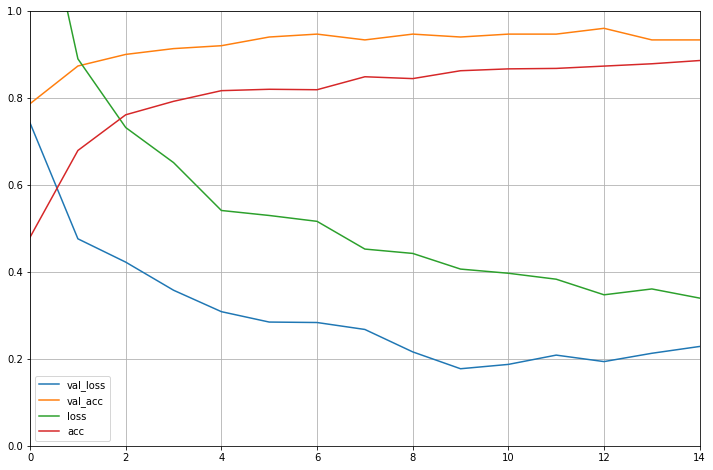

In [10]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [0]:
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc', color="red")
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss', color="red")
# plt.title('Training and validation loss')
# plt.legend()

#plt.show()

In [12]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=25,
    class_mode=None,
    shuffle=False,)
                                                        
Y_pred = model_vgg.predict_generator(test_generator, 
                                 steps=(test_generator.samples//test_generator.batch_size)+1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

y_pred

Found 77 images belonging to 6 classes.


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


array([0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [13]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

In [14]:
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred,  digits=4, target_names=class_labels))
print("Confusion Matrix: \n",confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

        city     1.0000    0.9000    0.9474        10
      desert     0.9091    1.0000    0.9524        10
    mountain     0.8571    0.9231    0.8889        13
      nature     0.8750    1.0000    0.9333        14
         sea     1.0000    0.8235    0.9032        17
    universe     1.0000    1.0000    1.0000        13

    accuracy                         0.9351        77
   macro avg     0.9402    0.9411    0.9375        77
weighted avg     0.9413    0.9351    0.9347        77

Confusion Matrix: 
 [[ 9  0  0  1  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 12  1  0  0]
 [ 0  0  0 14  0  0]
 [ 0  1  2  0 14  0]
 [ 0  0  0  0  0 13]]


In [0]:
#model_vgg.save('modello_colab_norm_2.h5')